<a href="https://colab.research.google.com/github/nikdrako/Machine-learning-projects/blob/main/Homework8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


In [ ]:
columns_names = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16']

In [ ]:
df = pd.read_csv('crx.data', header=None, names = columns_names)

In [ ]:
print(df.isna().any().any())
df.info()

False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [ ]:
df_clean = df[~df.isin(['?']).any(axis=1)]
df_clean['A2'] = pd.to_numeric(df_clean.loc[:, 'A2'] )
df_clean['A14'] = pd.to_numeric(df_clean.loc[:,'A14'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      653 non-null    object 
 1   A2      653 non-null    float64
 2   A3      653 non-null    float64
 3   A4      653 non-null    object 
 4   A5      653 non-null    object 
 5   A6      653 non-null    object 
 6   A7      653 non-null    object 
 7   A8      653 non-null    float64
 8   A9      653 non-null    object 
 9   A10     653 non-null    object 
 10  A11     653 non-null    int64  
 11  A12     653 non-null    object 
 12  A13     653 non-null    object 
 13  A14     653 non-null    int64  
 14  A15     653 non-null    int64  
 15  A16     653 non-null    object 
dtypes: float64(3), int64(3), object(10)
memory usage: 86.7+ KB


<ipython-input-553-e2a77e641860>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['A2'] = pd.to_numeric(df_clean.loc[:, 'A2'] )
<ipython-input-553-e2a77e641860>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['A14'] = pd.to_numeric(df_clean.loc[:,'A14'])


In [ ]:
y = df_clean.iloc[:,-1]
df_clean=pd.get_dummies(df_clean, columns=['A1','A4','A5','A6','A7','A9','A10','A12','A13'], drop_first=True)
df_clean = df_clean.drop('A16',axis = 1)
X = df_clean.iloc[:,:]

<Axes: >

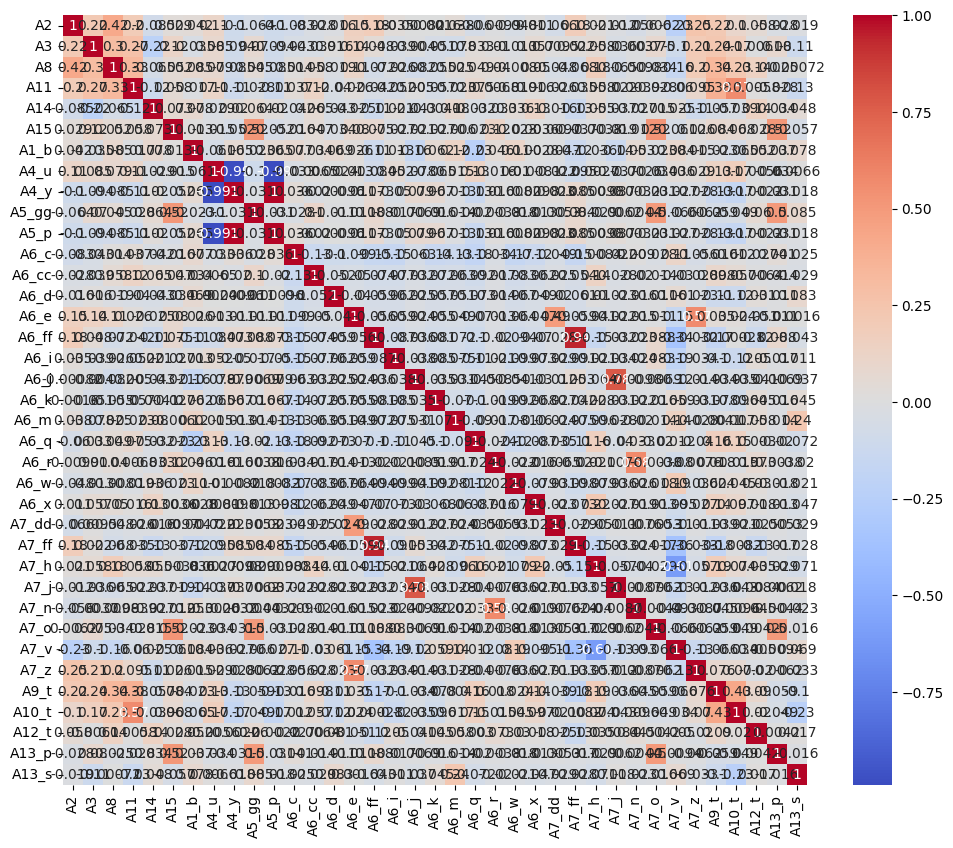

In [ ]:
correlation_matrix = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

бачимо, що є декільки корельованих фічей, але вони не впливають на результати, тому пропущу, опціонально їх видалити, пробував #X = X.drop('A4_u',axis = 1), але не покращуєтсья точність, тому лишив так

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 0 to 689
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A2      653 non-null    float64
 1   A3      653 non-null    float64
 2   A8      653 non-null    float64
 3   A11     653 non-null    int64  
 4   A14     653 non-null    int64  
 5   A15     653 non-null    int64  
 6   A1_b    653 non-null    bool   
 7   A4_u    653 non-null    bool   
 8   A4_y    653 non-null    bool   
 9   A5_gg   653 non-null    bool   
 10  A5_p    653 non-null    bool   
 11  A6_c    653 non-null    bool   
 12  A6_cc   653 non-null    bool   
 13  A6_d    653 non-null    bool   
 14  A6_e    653 non-null    bool   
 15  A6_ff   653 non-null    bool   
 16  A6_i    653 non-null    bool   
 17  A6_j    653 non-null    bool   
 18  A6_k    653 non-null    bool   
 19  A6_m    653 non-null    bool   
 20  A6_q    653 non-null    bool   
 21  A6_r    653 non-null    bool   
 22  A6_w   

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify= y )

In [ ]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42).fit(X_train,y_train)

In [ ]:
clf.feature_importances_

array([0.00960936, 0.00465067, 0.01136993, 0.06150573, 0.02705261,
       0.03880467, 0.        , 0.        , 0.        , 0.0101684 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00171784, 0.        , 0.        , 0.00223736, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.83288343, 0.        , 0.        ,
       0.        , 0.        ])

[Text(0.4375, 0.9, 'x[32] <= 0.5\ngini = 0.496\nsamples = 522\nvalue = [237.0, 285.0]'),
 Text(0.20833333333333334, 0.7, 'x[9] <= 0.5\ngini = 0.08\nsamples = 240\nvalue = [10, 230]'),
 Text(0.3229166666666667, 0.8, 'True  '),
 Text(0.16666666666666666, 0.5, 'x[1] <= 0.168\ngini = 0.072\nsamples = 239\nvalue = [9, 230]'),
 Text(0.08333333333333333, 0.3, 'x[4] <= 180.0\ngini = 0.32\nsamples = 15\nvalue = [3, 12]'),
 Text(0.041666666666666664, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.125, 0.1, 'gini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.25, 0.3, 'x[23] <= 0.5\ngini = 0.052\nsamples = 224\nvalue = [6, 218]'),
 Text(0.20833333333333334, 0.1, 'gini = 0.044\nsamples = 220\nvalue = [5, 215]'),
 Text(0.2916666666666667, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.7, 'x[3] <= 0.5\ngini = 0.314\nsamples = 282\nvalue = [227, 55]'),
 Text(0.5520833333333333, 0.8, '  False'),
 Tex

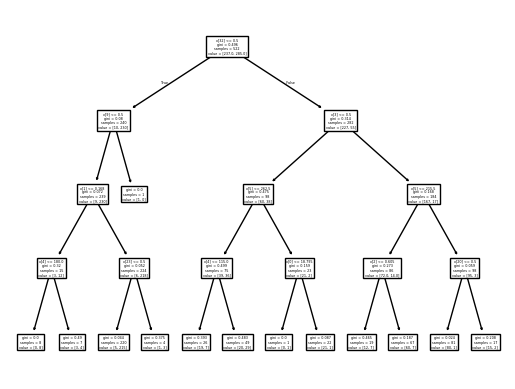

In [ ]:
from sklearn import tree
tree.plot_tree(clf)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred, target_names=[f'class_{i}' for i in range(2)]))

              precision    recall  f1-score   support

     class_0       0.85      0.76      0.80        59
     class_1       0.82      0.89      0.85        72

    accuracy                           0.83       131
   macro avg       0.83      0.83      0.83       131
weighted avg       0.83      0.83      0.83       131



In [ ]:
list(zip(X_test, y_pred, y_test))

[('A2', '-', '+'),
 ('A3', '+', '+'),
 ('A8', '+', '+'),
 ('A11', '+', '+'),
 ('A14', '+', '+'),
 ('A15', '-', '-'),
 ('A1_b', '-', '+'),
 ('A4_u', '-', '-'),
 ('A4_y', '+', '+'),
 ('A5_gg', '-', '-'),
 ('A5_p', '+', '+'),
 ('A6_c', '+', '+'),
 ('A6_cc', '-', '-'),
 ('A6_d', '-', '+'),
 ('A6_e', '+', '+'),
 ('A6_ff', '-', '-'),
 ('A6_i', '+', '+'),
 ('A6_j', '-', '-'),
 ('A6_k', '-', '-'),
 ('A6_m', '-', '-'),
 ('A6_q', '-', '-'),
 ('A6_r', '+', '-'),
 ('A6_w', '+', '-'),
 ('A6_x', '-', '+'),
 ('A7_dd', '-', '-'),
 ('A7_ff', '-', '-'),
 ('A7_h', '-', '-'),
 ('A7_j', '+', '+'),
 ('A7_n', '+', '+'),
 ('A7_o', '+', '-'),
 ('A7_v', '+', '+'),
 ('A7_z', '-', '-'),
 ('A9_t', '-', '-'),
 ('A10_t', '-', '-'),
 ('A12_t', '-', '-'),
 ('A13_p', '+', '+'),
 ('A13_s', '+', '+')]

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50,max_depth=4,n_jobs=3,random_state=42).fit(X_train,y_train)
rfc.feature_importances_

array([3.45529644e-02, 3.12845031e-02, 9.59413419e-02, 1.29672422e-01,
       2.45189834e-02, 8.51505703e-02, 1.92252809e-03, 5.16848154e-03,
       2.87483443e-03, 1.39284603e-03, 4.51458591e-03, 1.71544394e-03,
       2.76954205e-03, 2.22627468e-04, 7.81119594e-04, 1.41739318e-02,
       5.10539653e-03, 0.00000000e+00, 1.82098440e-03, 2.35776736e-04,
       5.59357531e-03, 9.79463665e-05, 3.41125291e-03, 1.29284626e-02,
       1.49346365e-04, 1.17213005e-02, 1.13601735e-02, 1.64928844e-04,
       0.00000000e+00, 0.00000000e+00, 2.02289248e-03, 1.87549814e-04,
       3.99290176e-01, 1.00110925e-01, 2.57910759e-03, 3.90551212e-05,
       6.52442435e-03])

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred, target_names=[f'class_{i}' for i in range(2)]))

              precision    recall  f1-score   support

     class_0       0.88      0.76      0.82        59
     class_1       0.82      0.92      0.87        72

    accuracy                           0.85       131
   macro avg       0.85      0.84      0.84       131
weighted avg       0.85      0.85      0.85       131

